Name: R.A.R.L.Ranasinghe

Index No: 200511V

### Question 01

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
image=cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\the_berry_farms_sunflower_field.jpeg",cv.IMREAD_REDUCED_COLOR_4)
#image_mathplot=cv.cvtColor(image,cv.COLOR_BGR2RGB)



[[ 1.80563016e-02  4.01608308e-02  4.41186636e-02  4.01608308e-02
   1.80563016e-02]
 [ 4.01608308e-02  2.42201087e-04 -9.80781303e-02  2.42201087e-04
   4.01608308e-02]
 [ 4.41186636e-02 -9.80781303e-02 -3.23963442e-01 -9.80781303e-02
   4.41186636e-02]
 [ 4.01608308e-02  2.42201087e-04 -9.80781303e-02  2.42201087e-04
   4.01608308e-02]
 [ 1.80563016e-02  4.01608308e-02  4.41186636e-02  4.01608308e-02
   1.80563016e-02]]
32.00000000000002


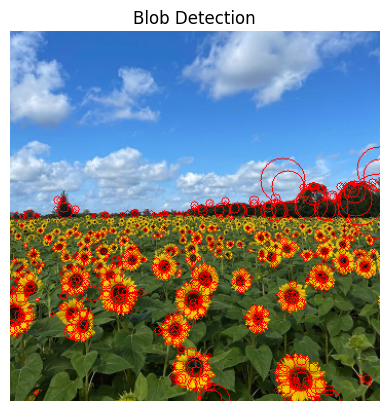

In [18]:
import numpy as np
import cv2 as cv

def custom_log_kernel(sigma_val, size):
    if size % 2 == 0:
        size += 1
    sigma_squared = sigma_val ** 2
    
    x_values, y_values = np.meshgrid(np.arange(-(size - 1) / 2, (size - 1) / 2 + 1), np.arange(-(size - 1) / 2, (size - 1) / 2 + 1))
    
    tmp_calculation = -(x_values ** 2 + y_values ** 2) / (2. * sigma_squared)
    custom_kernel = np.exp(tmp_calculation)
    
    min_value = np.finfo(float).eps * np.max(custom_kernel)
    custom_kernel[custom_kernel < min_value] = 0
    
    custom_kernel /= np.sum(custom_kernel)
    
    LoG_kernel = (x_values ** 2 + y_values ** 2 - 2 * sigma_squared) * custom_kernel / (sigma_squared ** 2) - np.mean((x_values ** 2 + y_values ** 2 - 2 * sigma_squared) * custom_kernel) / (size ** 2)
    
    return LoG_kernel

sigma_val = 1.0
kernel_size = 5
resulting_kernel = custom_log_kernel(sigma_val, kernel_size)
print(resulting_kernel)


def custom_blob_detection(image, sigma_scales, threshold):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_image = np.float32(gray_image)
    cv.normalize(gray_image, gray_image, 1, 0, cv.NORM_MINMAX)

    sigma0 = np.sqrt(2)
    k = np.sqrt(2)
    num_scales = sigma_scales
    sigmas = sigma0 * np.power(k, np.arange(num_scales))
    
    image_stack = None
    for i in range(num_scales):
        size = int(2 * np.ceil(4 * sigmas[i]) + 1)
        custom_kernel = custom_log_kernel(sigmas[i], size) * (sigmas[i] ** 2)
        filtered_image = cv.filter2D(gray_image, cv.CV_32F, custom_kernel)
        filtered_image = filtered_image ** 2
        if i == 0:
            image_stack = filtered_image
        else:
            image_stack = np.dstack((image_stack, filtered_image))

    scale_space = None
    for i in range(num_scales):
        filtered_image = cv.dilate(image_stack[:, :, i], np.ones((3, 3)), cv.CV_32F, (-1, -1), 1, cv.BORDER_CONSTANT)
        if i == 0:
            scale_space = filtered_image
        else:
            scale_space = np.dstack((scale_space, filtered_image))
    
    max_image_stack = np.amax(scale_space, axis=2)
    max_image_stack = np.repeat(max_image_stack[:, :, np.newaxis], num_scales, axis=2)
    max_image_stack = np.multiply((max_image_stack == scale_space), scale_space)

    x_coords = []
    y_coords = []
    radii = []
    for i in range(num_scales):
        radius = np.sqrt(2) * sigmas[i]
        threshold_value = threshold
        valid = (max_image_stack[:, :, i] == image_stack[:, :, i]) * image_stack[:, :, i]
        valid[valid <= threshold_value] = 0
        (x, y) = np.nonzero(valid)
        x_coords.extend(x)
        y_coords.extend(y)
        radii.extend([radius] * len(x))

    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    radii = np.array(radii)

    return x_coords, y_coords, radii

# Example usage:
image_path = r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\the_berry_farms_sunflower_field.jpeg"
input_image = cv.imread(image_path, cv.IMREAD_REDUCED_COLOR_4)

x_all_coords = []
y_all_coords = []
radii_all_values = []

for sigma_scale in range(2, 10):
    x_coords, y_coords, radii = custom_blob_detection(input_image, sigma_scale, 0.03)
    x_all_coords.append(x_coords)
    y_all_coords.append(y_coords)
    radii_all_values.append(radii)

x_all_coords = np.concatenate(x_all_coords, axis=None)
y_all_coords = np.concatenate(y_all_coords, axis=None)
radii_all_values = np.concatenate(radii_all_values, axis=None)
print(max(radii_all_values))

output_image = input_image.copy()
for i in range(len(x_all_coords)):
    cv.circle(output_image, (y_all_coords[i], x_all_coords[i]), int(radii_all_values[i]), (0, 0, 255), 1)

plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title("Blob Detection")
plt.axis('off')
plt.show()


### Question 02

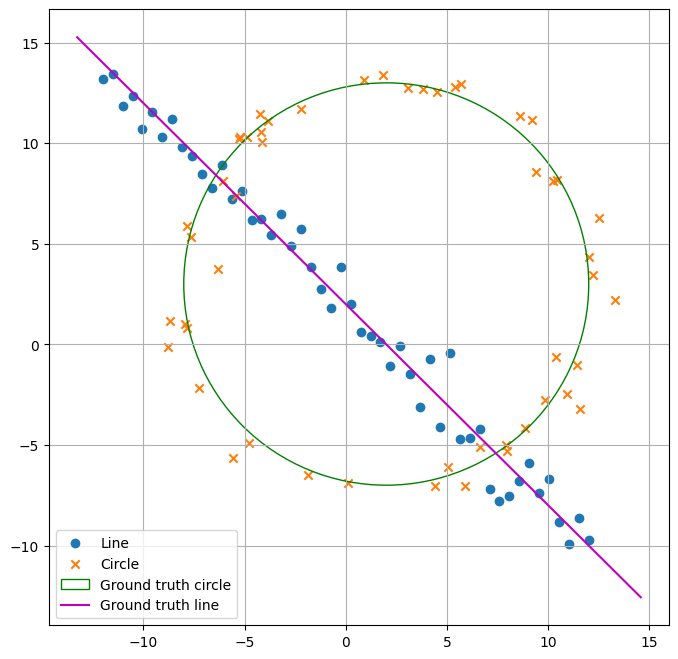

In [19]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 100
half_num_points = num_points // 2

circle_radius = 10
circle_center = (2, 3)
circle_noise_scale = circle_radius / 16

circle_angles = np.random.uniform(0, 2 * np.pi, half_num_points)
circle_noise = circle_noise_scale * np.random.randn(half_num_points)
circle_x = circle_center[0] + (circle_radius + circle_noise) * np.cos(circle_angles)
circle_y = circle_center[1] + (circle_radius + circle_noise) * np.sin(circle_angles)

circle_points = np.column_stack((circle_x, circle_y))

line_noise_scale = 1.0
line_params = (-1, 2)

line_x = np.linspace(-12, 12, half_num_points)
line_y = line_params[0] * line_x + line_params[1] + line_noise_scale * np.random.randn(half_num_points)

line_points = np.column_stack((line_x, line_y))

all_points = np.vstack((circle_points, line_points))

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(line_points[:, 0], line_points[:, 1], label='Line', marker='o')
ax.scatter(circle_points[:, 0], circle_points[:, 1], label='Circle', marker='x')

ground_truth_circle = plt.Circle(circle_center, circle_radius,
                                 color='g', fill=False, label='Ground truth circle')
ax.add_patch(ground_truth_circle)

x_min, x_max = ax.get_xlim()
x_range = np.array([x_min, x_max])
y_range = line_params[0] * x_range + line_params[1]
plt.plot(x_range, y_range, color='m', label='Ground truth line')

plt.legend()
plt.grid(True)
plt.show()


In [24]:
def Line_RANSAC(points, distance_threshold):
    S = 2
    max_iterations = 10000

    best_line = None
    best_inliers_index = []

    for _ in range(max_iterations):

        # Randomly select two points to define a line
        sample_indices = np.random.choice(len(points), size=S, replace=False)
        sample = points[sample_indices]

        # Calculate the unit normal vector to the line
        x1, y1 = sample[0]
        x2, y2 = sample[1]
        if x1 == x2:
            continue  # Avoid division by zero
        direction_vector = np.array([y1 - y2, x2 - x1])
        unit_normal_vector = direction_vector / np.linalg.norm(direction_vector)
        d_init = np.abs(np.dot(unit_normal_vector, np.array([x1, y1])))

        # Calculate the perpendicular distance from the origin to the line
        perpendicular_distances = [np.abs(np.dot(unit_normal_vector, np.array([x, y]))) for x, y in points]

        # Find inliers based on the distance threshold
        inliers_index = [i for i, distance in enumerate(perpendicular_distances) if np.abs(distance - d_init) < distance_threshold]

        # Update the best model if this one has more inliers
        if len(inliers_index) > len(best_inliers_index):
            best_line = (unit_normal_vector, d_init)
            best_inliers_index = inliers_index
            best_fitting_points = sample

    return best_line, best_inliers_index, best_fitting_points


In [25]:

from scipy.optimize import minimize
import tikzplotlib

# Calculate the circle parameters
def circle_equation(params, points):
    h, k, r = params
    residuals = []
    for x, y in points:
        residuals.append((x - h) ** 2 + (y - k) ** 2 - r ** 2)
    return np.array(residuals)

def circle_RANSAC(points, radial_distance_threshold):
    S = 3
    max_iterations = 10000

    best_circle = None
    best_inliers_index = []

    for _ in range(max_iterations):
        # Randomly select three points to define a circle
        sample_indices = np.random.choice(len(points), size=S, replace=False)
        sample = points[sample_indices]

        # Use an optimizer to get values for circle parameters
        result = minimize(lambda params: np.sum(circle_equation(params, sample) ** 2), [0, 0, 1])

        # Optimized center coordinates and radius
        h_opt, k_opt, r_opt = result.x

        # Calculate the radial distance from the points to the circle
        radial_distances = [np.abs(np.sqrt((x - h_opt) ** 2 + (y - k_opt) ** 2) - r_opt) for x, y in points]

        # Find inliers based on the distance threshold
        inliers_index = [i for i, distance in enumerate(radial_distances) if distance < radial_distance_threshold]

        # Update the best model if this one has more inliers
        if len(inliers_index) > len(best_inliers_index):
            best_circle = (np.array([h_opt, k_opt]), r_opt)
            best_inliers_index = inliers_index
            best_fitting_points = sample

    return best_circle, best_inliers_index, best_fitting_points

# Generate a Noisy Point Set Conforming to a Line and a Circle
# Set random seed for reproducibility (optional)
# np.random.seed(0)

N = 100
half_n = N // 2
r = 10
circle_center = (2, 3)  # Center
s_circle = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)

n = s_circle * np.random.randn(half_n)

x, y = circle_center[0] + (r + n) * np.cos(t), circle_center[1] + (r + n) * np.sin(t)

X_circ = np.column_stack((x, y))

s_line = 1.0
line_slope, line_intercept = -1, 2
x = np.linspace(-12, 12, half_n)
y = line_slope * x + line_intercept + s_line * np.random.randn(half_n)

X_line = np.column_stack((x, y))

X = np.vstack((X_circ, X_line))  # All points


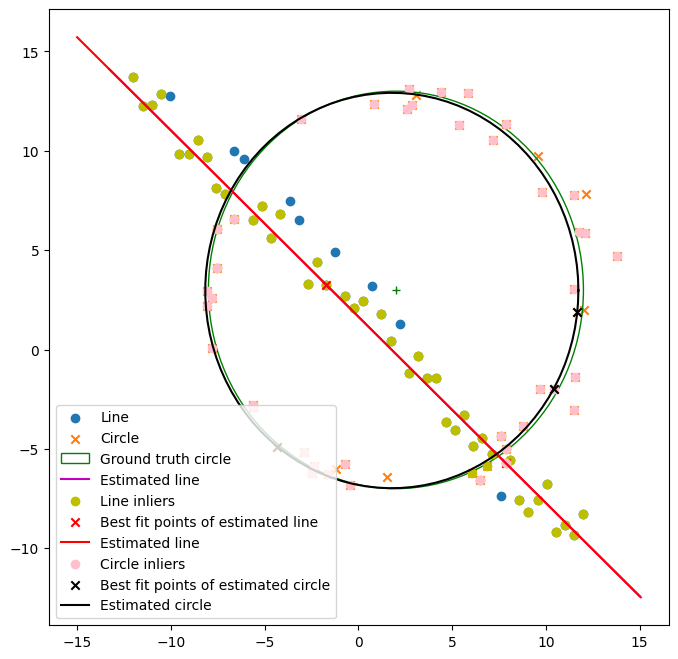

In [28]:

# estimated line
estimated_line, inliers_index_line, best_fit_points_line = Line_RANSAC(X, 1)
x_val = np.linspace(-15, 15, 100)

# calculate the y values of the estimated line
m_est = -estimated_line[0][0] / estimated_line[0][1]
b_est = estimated_line[1] / np.cos(np.arctan(abs(m_est)))
y_val = m_est * x_val + b_est

# estimated circle
points_circle = X.copy()

# remove the inliers of the line from points_circle
points_circle = np.delete(points_circle, inliers_index_line, axis=0)

estimated_circle, inliers_index_circle, best_fit_points_circle = circle_RANSAC(points_circle, 1)
theta = np.linspace(0, 2 * np.pi, 100)
x_val_circle = estimated_circle[0][0] + estimated_circle[1] * np.cos(theta)
y_val_circle = estimated_circle[0][1] + estimated_circle[1] * np.sin(theta)

# Plotting
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle', marker='x')
circle_gt = plt.Circle((circle_center[0], circle_center[1]), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(circle_center[0], circle_center[1], '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])

# Use m_est and b_est as the slope and intercept of the estimated line
y_ = m_est * x_ + b_est
plt.plot(x_, y_, color='m', label='Estimated line')

ax.scatter(X[inliers_index_line][:, 0], X[inliers_index_line][:, 1], color='y', label='Line inliers')
ax.scatter(np.array(best_fit_points_line)[:, 0], np.array(best_fit_points_line)[:, 1], marker='x', color='r', label='Best fit points of estimated line')
ax.plot(x_val, y_val, color='r', label='Estimated line')
ax.scatter(X[inliers_index_circle][:, 0], X[inliers_index_circle][:, 1], color='pink', label='Circle inliers')
ax.scatter(np.array(best_fit_points_circle)[:, 0], np.array(best_fit_points_circle)[:, 1], marker='x', color='k', label='Best fit points of estimated circle')
ax.plot(x_val_circle, y_val_circle, color='k', label='Estimated circle')
plt.legend()
plt.show()




### Question 03

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


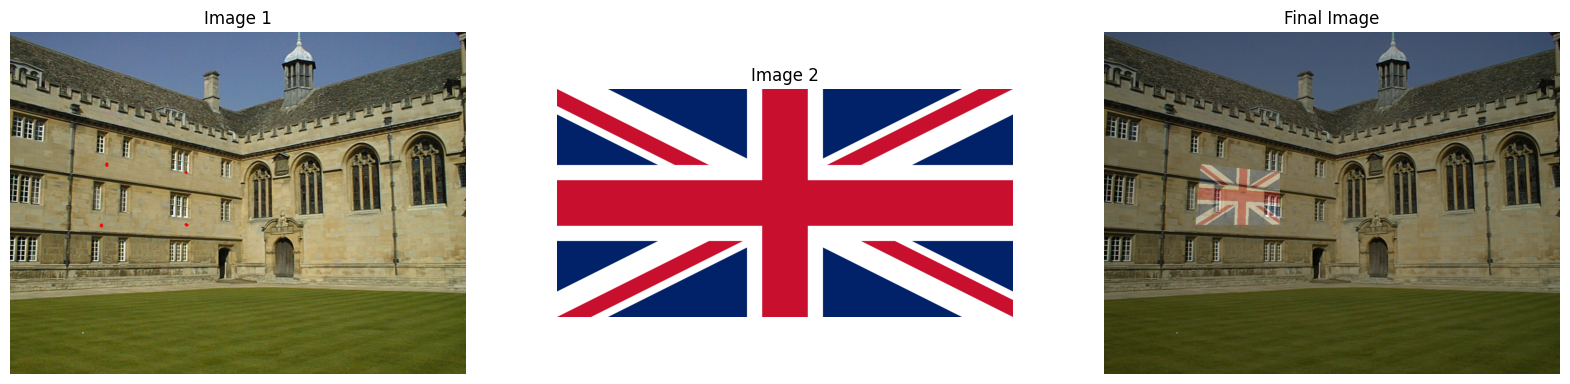

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mousePoints(event, x, y, flags, params):
    global coordinates
    global count

    if event == cv.EVENT_LBUTTONDOWN:
        coordinates.append([x, y])
        count += 1

        cv.circle(original_image, (x, y), 2, (0, 0, 255), 2)
        cv.imshow("Image", original_image)

coordinates = []
count = 0
original_image = None

image_1 = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\001.jpg", cv.IMREAD_COLOR)
image_2 = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\Flag_of_the_United_Kingdom_(1-2).png", cv.IMREAD_COLOR)

if image_1 is None or image_2 is None:
    print("Error: One or both images could not be loaded.")
    exit()

image_1 = image_1.astype(np.float64) / np.iinfo(image_1.dtype).max
image_2 = image_2.astype(np.float64) / np.iinfo(image_2.dtype).max

original_image = image_1.copy()

cv.imshow("Image", image_1)
cv.setMouseCallback("Image", mousePoints)
cv.waitKey(0)
cv.destroyAllWindows()

X = np.array([[0, 0, 1], [image_2.shape[1], 0, 1], [image_2.shape[1], image_2.shape[0], 1], [0, image_2.shape[0], 1]]).T
Y = np.array([[coordinates[0][0], coordinates[0][1], 1], [coordinates[1][0], coordinates[1][1], 1],
              [coordinates[2][0], coordinates[2][1], 1], [coordinates[3][0], coordinates[3][1], 1]]).T

H = cv.findHomography(X[:2].T, Y[:2].T)[0]
tran_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

alpha = 0.7
beta = 1 - alpha
blended_img = cv.addWeighted(image_1, alpha, tran_image_2, beta, 0)
blended_img[blended_img > 1] = 1

original_image_rgb = cv.cvtColor(original_image.astype(np.float32), cv.COLOR_BGR2RGB) 
flag_img_rgb = cv.cvtColor(image_2.astype(np.float32), cv.COLOR_BGR2RGB)
superimposed_img_rgb = cv.cvtColor(blended_img.astype(np.float32), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(original_image_rgb)
ax[1].imshow(flag_img_rgb)
ax[2].imshow(superimposed_img_rgb)

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

plt.show()


### Question 04


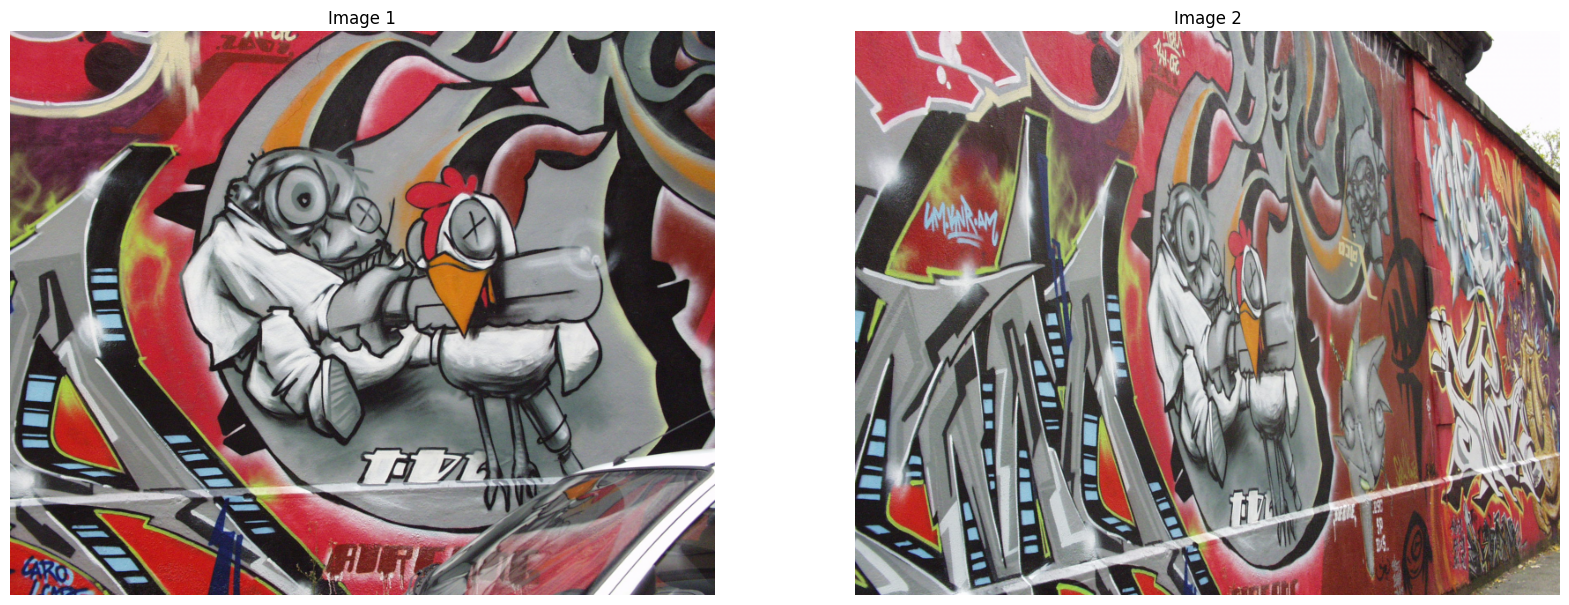

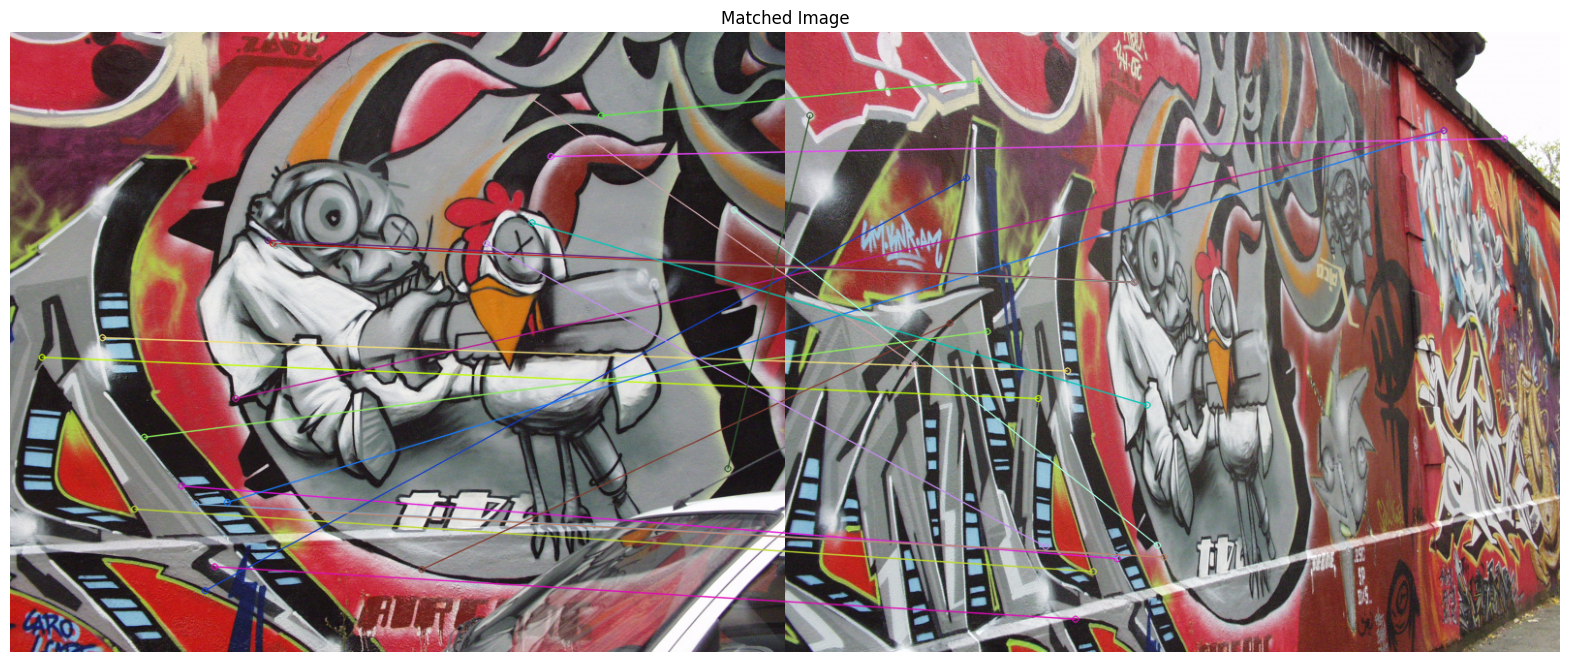

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_image(image_path):
    img = cv.imread(image_path, cv.IMREAD_COLOR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_rgb

img1_rgb = load_and_convert_image(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\img1.ppm")
img2_rgb = load_and_convert_image(r'C:\Users\Ramudi\Documents\Semester 05\Image_Processing\img5.ppm')

sift = cv.SIFT_create(nOctaveLayers=3, contrastThreshold=0.1, edgeThreshold=10, sigma=1)

kp1, des1 = sift.detectAndCompute(img1_rgb, None)
kp2, des2 = sift.detectAndCompute(img2_rgb, None)

bf = cv.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)

valid_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

img_matches = cv.drawMatches(img1_rgb, kp1, img2_rgb, kp2, valid_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img1_rgb)
ax[1].imshow(img2_rgb)
ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[0].axis("off")
ax[1].axis("off")
plt.show()

plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.title("Matched Image")
plt.axis("off")
plt.show()


[[-2.73445704e-01 -3.84930825e-01  3.07932636e+02]
 [-4.80647808e-01 -2.14415763e-01  3.18733705e+02]
 [-1.13962762e-03 -1.19297391e-03  1.00000000e+00]]


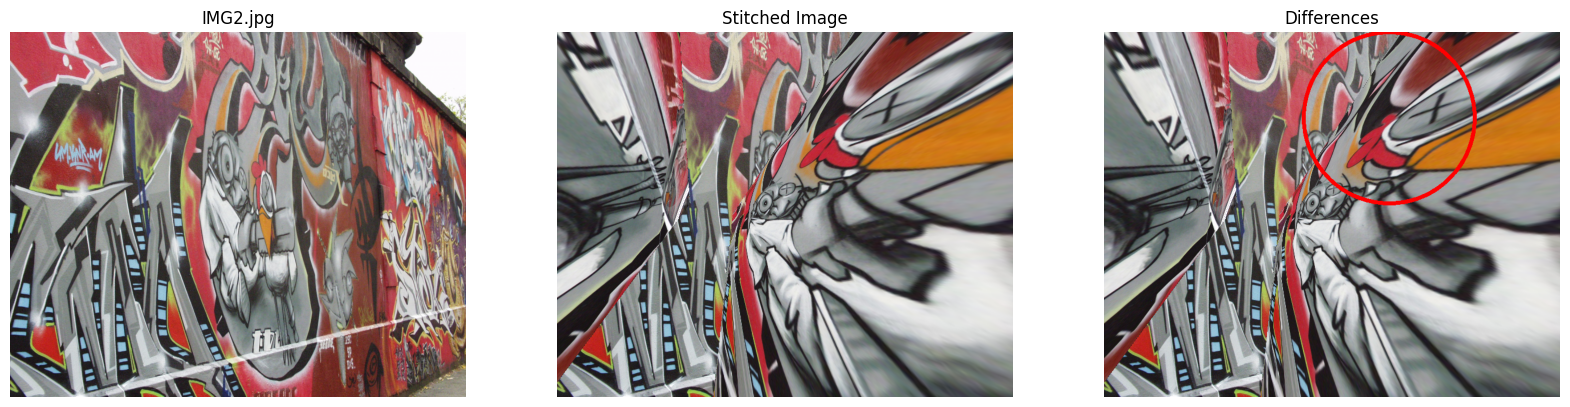

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def compute_distance(P1, P2, H):
    p1 = np.array([P1[0], P1[1], 1])
    p2 = np.array([P2[0], P2[1], 1])

    p2_estimate = np.dot(H, p1.T)
    p2_estimate = (1 / p2_estimate[2]) * p2_estimate

    return np.linalg.norm(p2.T - p2_estimate)

def estimate_ransac_homography(points1, points2, threshold=40, num_iterations=100, min_inlier_count=10):
    inlier_count, selected_inliers, best_H = 0, None, None
    points = np.hstack((points1, points2))

    for _ in range(num_iterations):
        np.random.shuffle(points)
        POINTS1, POINTS1_rem, POINTS2, POINTS2_rem = points[:4, :2], points[4:, :2], points[:4, 2:], points[4:, 2:]
        H = cv.findHomography(POINTS1, POINTS2)[0]
        inliers = [(POINTS1_rem[i], POINTS2_rem[i]) for i in range(len(POINTS1_rem)) if compute_distance(POINTS1_rem[i], POINTS2_rem[i], H) < threshold]

        if len(inliers) > inlier_count and len(inliers) >= min_inlier_count:
            inlier_count = len(inliers)
            selected_inliers = np.array(inliers)
            best_H = H

    return best_H

sift = cv.SIFT_create(nOctaveLayers=3, contrastThreshold=0.08, edgeThreshold=12, sigma=0.9)

IMG2 = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\img1.ppm")
IMG1 = cv.imread(r'C:\Users\Ramudi\Documents\Semester 05\Image_Processing\img5.ppm')

key_points_1, Descriptor_1 = sift.detectAndCompute(IMG1, None)
key_points_2, Descriptor_2 = sift.detectAndCompute(IMG2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(Descriptor_1, Descriptor_2, k=2)
good, POINTS1, POINTS2 = [], [], []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        POINTS1.append(key_points_1[m.queryIdx].pt)
        POINTS2.append(key_points_2[m.trainIdx].pt)

good, POINTS1, POINTS2 = np.array(good), np.array(POINTS1), np.array(POINTS2)

H = estimate_ransac_homography(POINTS2, POINTS1)

print(H)

H = np.array(H)

img_p = cv.warpPerspective(IMG2, H, (IMG1.shape[1], IMG1.shape[0]))

ret, threshold = cv.threshold(img_p, 10, 1, cv.THRESH_BINARY_INV)

IMG1_THRESHOLD = np.multiply(threshold, IMG1)

BLENDED_IMG = cv.addWeighted(IMG1_THRESHOLD, 1, img_p, 1, 0)

fig, ax = plt.subplots(1, 3, figsize=(20, 20))

ax[0].imshow(cv.cvtColor(IMG1, cv.COLOR_BGR2RGB))
ax[0].set_title("IMG2.jpg")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(BLENDED_IMG, cv.COLOR_BGR2RGB))
ax[1].set_title("Stitched Image")
ax[1].axis("off")

BLENDED_IMG = cv.circle(BLENDED_IMG, (500, 150), 150, (0, 0, 255), 5)

ax[2].imshow(cv.cvtColor(BLENDED_IMG, cv.COLOR_BGR2RGB))
ax[2].set_title("Differences")
ax[2].axis("off")

plt.show()
